In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ptitprince
import seaborn as sns

<Axes: >

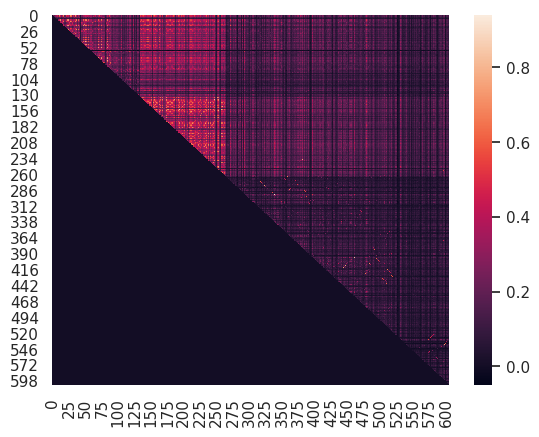

In [34]:
fpath = '/home/hyruuk/GitHub/neuromod/shinobi_fmri/data/processed/ses-level_maps_corrs.pkl'
with open(fpath, 'rb') as f:
    datadict = pickle.load(f)

condlist = np.unique(datadict['cond'])
subjlist = np.unique(datadict['subj'])
n_runs = len(datadict['fnames'])

corr_r2 = []
corr_cond = []
corr_intera = []

# Loop to get intra-subj R2
for cond in condlist:
    for subj in subjlist:
        for i in range(n_runs):
            for j in range(n_runs):
                if i<j:
                    if datadict['cond'][i] == cond and datadict['cond'][j] == cond:
                        if datadict['subj'][i] == subj and datadict['subj'][j] == subj:
                            corr_r2.append(datadict['corr_matrix'][i,j])
                            corr_cond.append(cond)
                            corr_intera.append('intra-subject')
                            

# Loop to get inter-subj R2
for cond in condlist:
    for subj in subjlist:
        for i in range(n_runs):
            for j in range(n_runs):
                if i<j:
                    if datadict['cond'][i] == cond and datadict['cond'][j] == cond:
                        if datadict['subj'][i] == subj and datadict['subj'][j] != subj:
                            corr_r2.append(datadict['corr_matrix'][i,j])
                            corr_cond.append(cond)
                            corr_intera.append('inter-subject')


# Loop to get intra-subj R2
for cond in condlist:
    for subj in subjlist:
        for i in range(n_runs):
            for j in range(n_runs):
                if i<j:
                    if datadict['cond'][i] == cond and datadict['cond'][j] != cond:
                        if datadict['subj'][i] == subj and datadict['subj'][j] == subj:
                            corr_r2.append(datadict['corr_matrix'][i,j])
                            corr_cond.append('Inter-annotations')
                            corr_intera.append('intra-subject')
                            

# Loop to get inter-subj R2
for cond in condlist:
    for subj in subjlist:
        for i in range(n_runs):
            for j in range(n_runs):
                if i<j:
                    if datadict['cond'][i] == cond and datadict['cond'][j] != cond:
                        if datadict['subj'][i] == subj and datadict['subj'][j] != subj:
                            corr_r2.append(datadict['corr_matrix'][i,j])
                            corr_cond.append('Inter-annotations')
                            corr_intera.append('inter-subject')

plot_df = pd.DataFrame({'r2':corr_r2,
                        'event': corr_cond,
                        'comparison': corr_intera})


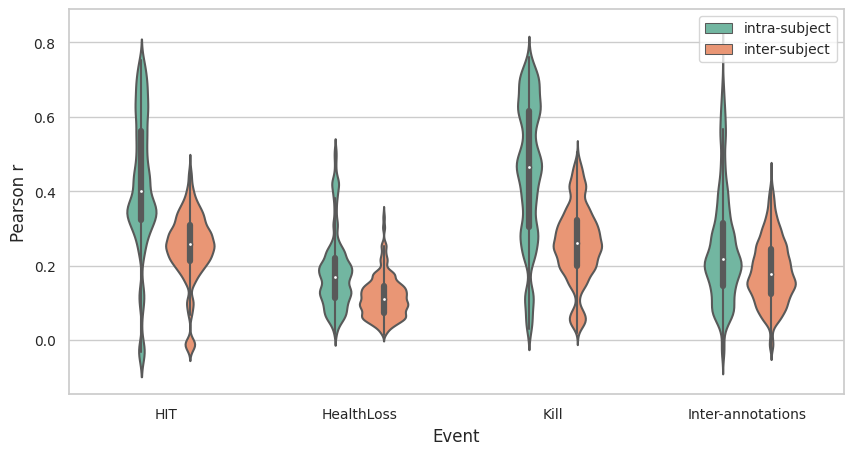

In [39]:

%matplotlib inline
dx="event"; dy="r2"; dhue = "comparison"; ort="v"; pal = "Set2"; sigma = .15
f, ax = plt.subplots(figsize=(10,5))
sns.set(font_scale = 2)
sns.set_theme(style="whitegrid")
'''
ax=ptitprince.RainCloud(x = dx, y = dy, hue = dhue, 
                        data = plot_df, palette = pal, bw = sigma,
                        width_viol = 1, ax = ax, orient = ort, alpha = .65, 
                        offset=-0.05, move=.18,  width_box=.05, pointplot=False, rain_alpha=0.5)
'''
sns.violinplot(x = dx, y = dy, hue = dhue,
                data = plot_df, palette = pal, bw = sigma,
                width = 0.5, ax = ax, orient = ort, alpha = .65)
#ax.set_title('Correlations between beta maps', fontsize=14)
ax.set_xlabel('Event', fontsize=12)
ax.set_ylabel('Pearson r', fontsize=12)
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
plt.legend(loc='upper right')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], fontsize=10)

import matplotlib.patches
import matplotlib.lines

#def remove_boxplot(ax):
"""Remove boxplot but retain median line.
for child in ax.get_children():
    # Lines (e.g., whiskers, median line) are usually of type Line2D
    # Box is usually a PathPatch
    if isinstance(child, matplotlib.patches.PathPatch):
        #if "facecolor" not in child.properties().keys():
        child.remove()
    if isinstance(child, matplotlib.lines.Line2D):
        if type(child.get_color()) is tuple:
            child.remove()
        if child.get_color()=='black':
            child.remove()
        if child.get_color()=='#595959':
            child.remove()
"""
#    return ax
#ax = remove_boxplot(ax)
plt.draw()  # Redraw plot after removal


(0.9176470588235294, 0.9176470588235294, 0.9490196078431372, 1.0)

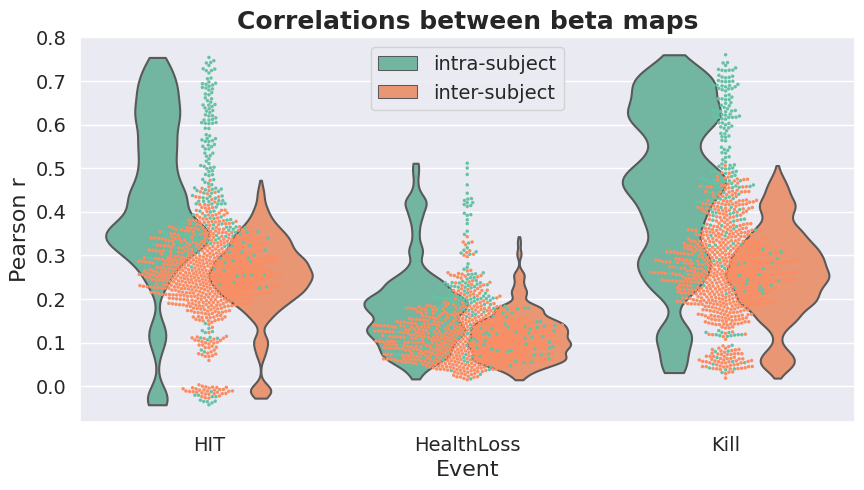

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

dx="event"; dy="r2"; dhue = "comparison"; ort="v"; pal = "Set2"; sigma = .15
f, ax = plt.subplots(figsize=(10,5))
sns.set(font_scale = 2)
sns.violinplot(x = dx, y = dy, hue = dhue, data = plot_df, palette = pal, inner = None, bw = sigma, scale="width", cut=0)
sns.swarmplot(x = dx, y = dy, hue = dhue, data = plot_df, palette = pal, size = 2.5)
ax.set_title('Correlations between beta maps', fontsize=18, fontweight='bold')
ax.set_xlabel('Event', fontsize=16)
ax.set_ylabel('Pearson r', fontsize=16)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(loc='upper right')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], fontsize=14)

In [8]:
plot_df

,r2,event,comparison
0,0.301782,HIT,intra-subject
1,0.393304,HIT,intra-subject
2,0.342176,HIT,intra-subject
3,0.320611,HIT,intra-subject
4,-0.032222,HIT,intra-subject
...,...,...,...
2878,0.211409,Kill,inter-subject
2879,0.182633,Kill,inter-subject
2880,0.040448,Kill,inter-subject
2881,0.325242,Kill,inter-subject


Text(0, 0.5, 'Pearson r')

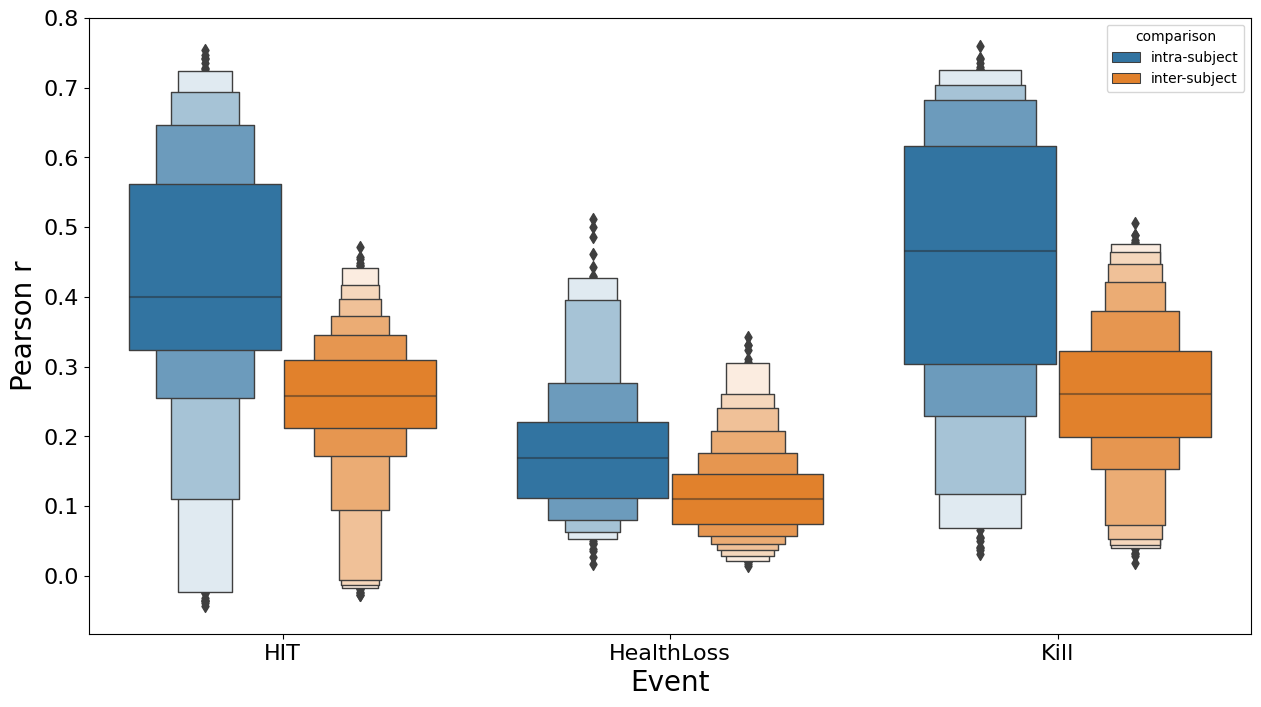

In [9]:
import seaborn as sbn
fig, ax = plt.subplots(figsize=(15,8))
sbn.boxenplot(data=plot_df, x='event', y='r2', hue='comparison', scale='area')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
ax.set_xlabel('Event', fontsize=20)
ax.set_ylabel('Pearson r', fontsize=20)

/home/hyruuk/mambaforge/envs/shinobi2/lib/python3.8/site-packages/ptitprince/PtitPrince.py:64: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  for h in self.plot_hues[i]], np.bool)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

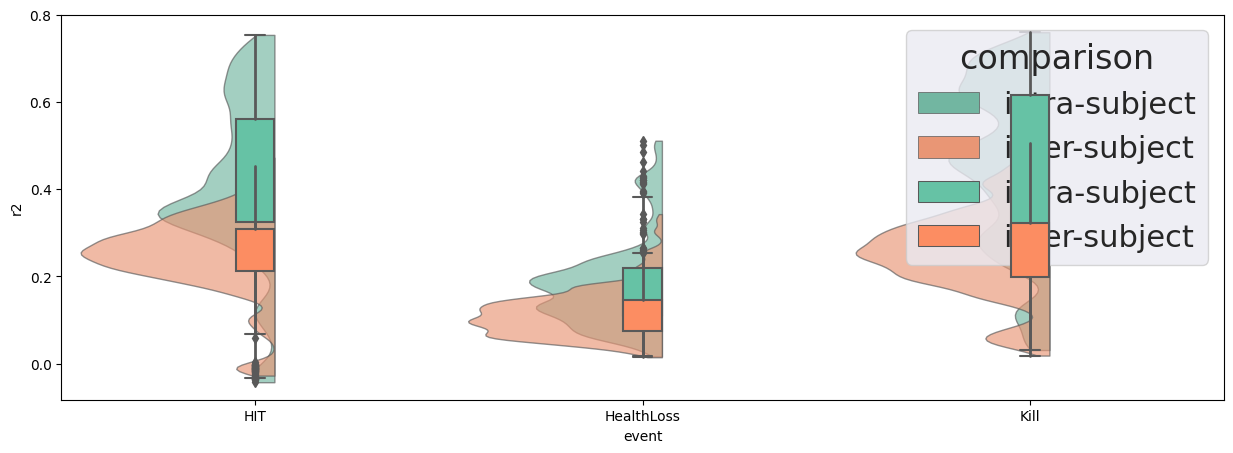